In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import tensorflow as tf
#importeer Tensorflow namespaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
#K.set_image_dim_ordering('tf')

###### Voor Tensorflow-GPU ########

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays_test/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays_test/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))



44
23
7
7
2
2


In [15]:
# Reshape
X_train = X_train.reshape((len(X_train),64, 64,4))
X_test = X_test.reshape((len(X_test),64, 64,4))

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        2368      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
Total params: 76,224
Trainable params: 76,224
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        2368      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=70, 
                    validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 3.8990 - accuracy: 0.0000e+00 - val_loss: 2.9165 - val_accuracy: 0.0000e+00
Epoch 2/70
1/1 [==============================] - 0s 255ms/step - loss: 3.1464 - accuracy: 0.0000e+00 - val_loss: 2.9417 - val_accuracy: 0.0000e+00
Epoch 3/70
1/1 [==============================] - 0s 382ms/step - loss: 2.9164 - accuracy: 0.0000e+00 - val_loss: 2.6672 - val_accuracy: 0.0000e+00
Epoch 4/70
1/1 [==============================] - 0s 289ms/step - loss: 2.5815 - accuracy: 0.0000e+00 - val_loss: 2.5052 - val_accuracy: 0.0000e+00
Epoch 5/70
1/1 [==============================] - 0s 260ms/step - loss: 2.4150 - accuracy: 0.0000e+00 - val_loss: 2.4391 - val_accuracy: 0.0000e+00
Epoch 6/70
1/1 [==============================] - 0s 317ms/step - loss: 2.3230 - accuracy: 0.0000e+00 - val_loss: 2.3824 - val_accuracy: 0.0000e+00
Epoch 7/70
1/1 [==============================] - 0s 209ms/step - loss: 2.2664 - accuracy: 0.0000e+00 - val_loss: 2

1/1 [==============================] - 0s 218ms/step - loss: 0.7725 - accuracy: 0.7143 - val_loss: 0.9536 - val_accuracy: 0.5000
Epoch 59/70
1/1 [==============================] - 0s 154ms/step - loss: 0.7669 - accuracy: 0.7143 - val_loss: 0.9488 - val_accuracy: 0.5000
Epoch 60/70
1/1 [==============================] - 0s 166ms/step - loss: 0.7616 - accuracy: 0.7143 - val_loss: 0.9442 - val_accuracy: 0.5000
Epoch 61/70
1/1 [==============================] - 0s 193ms/step - loss: 0.7566 - accuracy: 0.7143 - val_loss: 0.9399 - val_accuracy: 0.5000
Epoch 62/70
1/1 [==============================] - 0s 182ms/step - loss: 0.7519 - accuracy: 0.7143 - val_loss: 0.9359 - val_accuracy: 0.5000
Epoch 63/70
1/1 [==============================] - 0s 194ms/step - loss: 0.7474 - accuracy: 0.7143 - val_loss: 0.9320 - val_accuracy: 0.5000
Epoch 64/70
1/1 [==============================] - 0s 187ms/step - loss: 0.7431 - accuracy: 0.7143 - val_loss: 0.9284 - val_accuracy: 0.5000
Epoch 65/70
1/1 [========

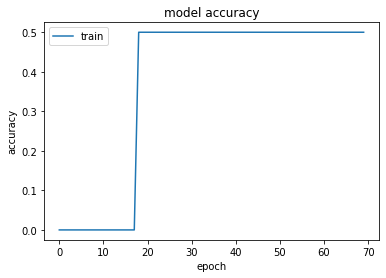

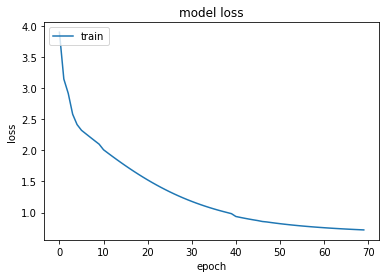

In [21]:
# Accuray 
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



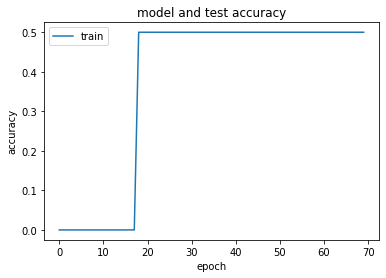

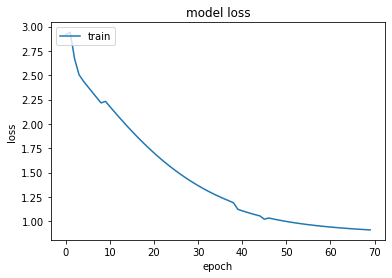

In [22]:
# Accuray  val
plt.plot(history.history['val_accuracy'])

plt.title('model and test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Performantie op de test data
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

/home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




accuracy score: 50.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[0 1]
 [0 1]]


/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
